In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


commodities = ['Maize', 'Wheat', 'Oats', 'Soybeans']
DATA_PATH = '/kaggle/input/processed-data' # Remove the /kaggle/input prefix for reproducing the results
Y_COLUMN = 'Sep'

In [2]:
commodities_datasets = []
for commodity in commodities:
    dataset = pd.read_csv(f'{DATA_PATH}/full_{commodity}.csv')
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset = dataset[['Date', Y_COLUMN, "Prime"]]
    commodities_datasets.append(dataset)

In [3]:
train_datasets = []
test_datasets = []
for i in range(len(commodities_datasets)):
    split_index = int(len(commodities_datasets[i]) * 0.8)
    train_df = commodities_datasets[i].iloc[:split_index]
    test_df = commodities_datasets[i].iloc[split_index:]
    train_datasets.append(train_df)
    test_datasets.append(test_df)
    assert len(commodities_datasets[i]) == len(train_df) + len(test_df)
    
df = train_datasets[0]
data = df[Y_COLUMN]

In [4]:
# The best p_orders for each type of commodity, when using AR(p) models
best_orders = [2, 9, 9, 5]

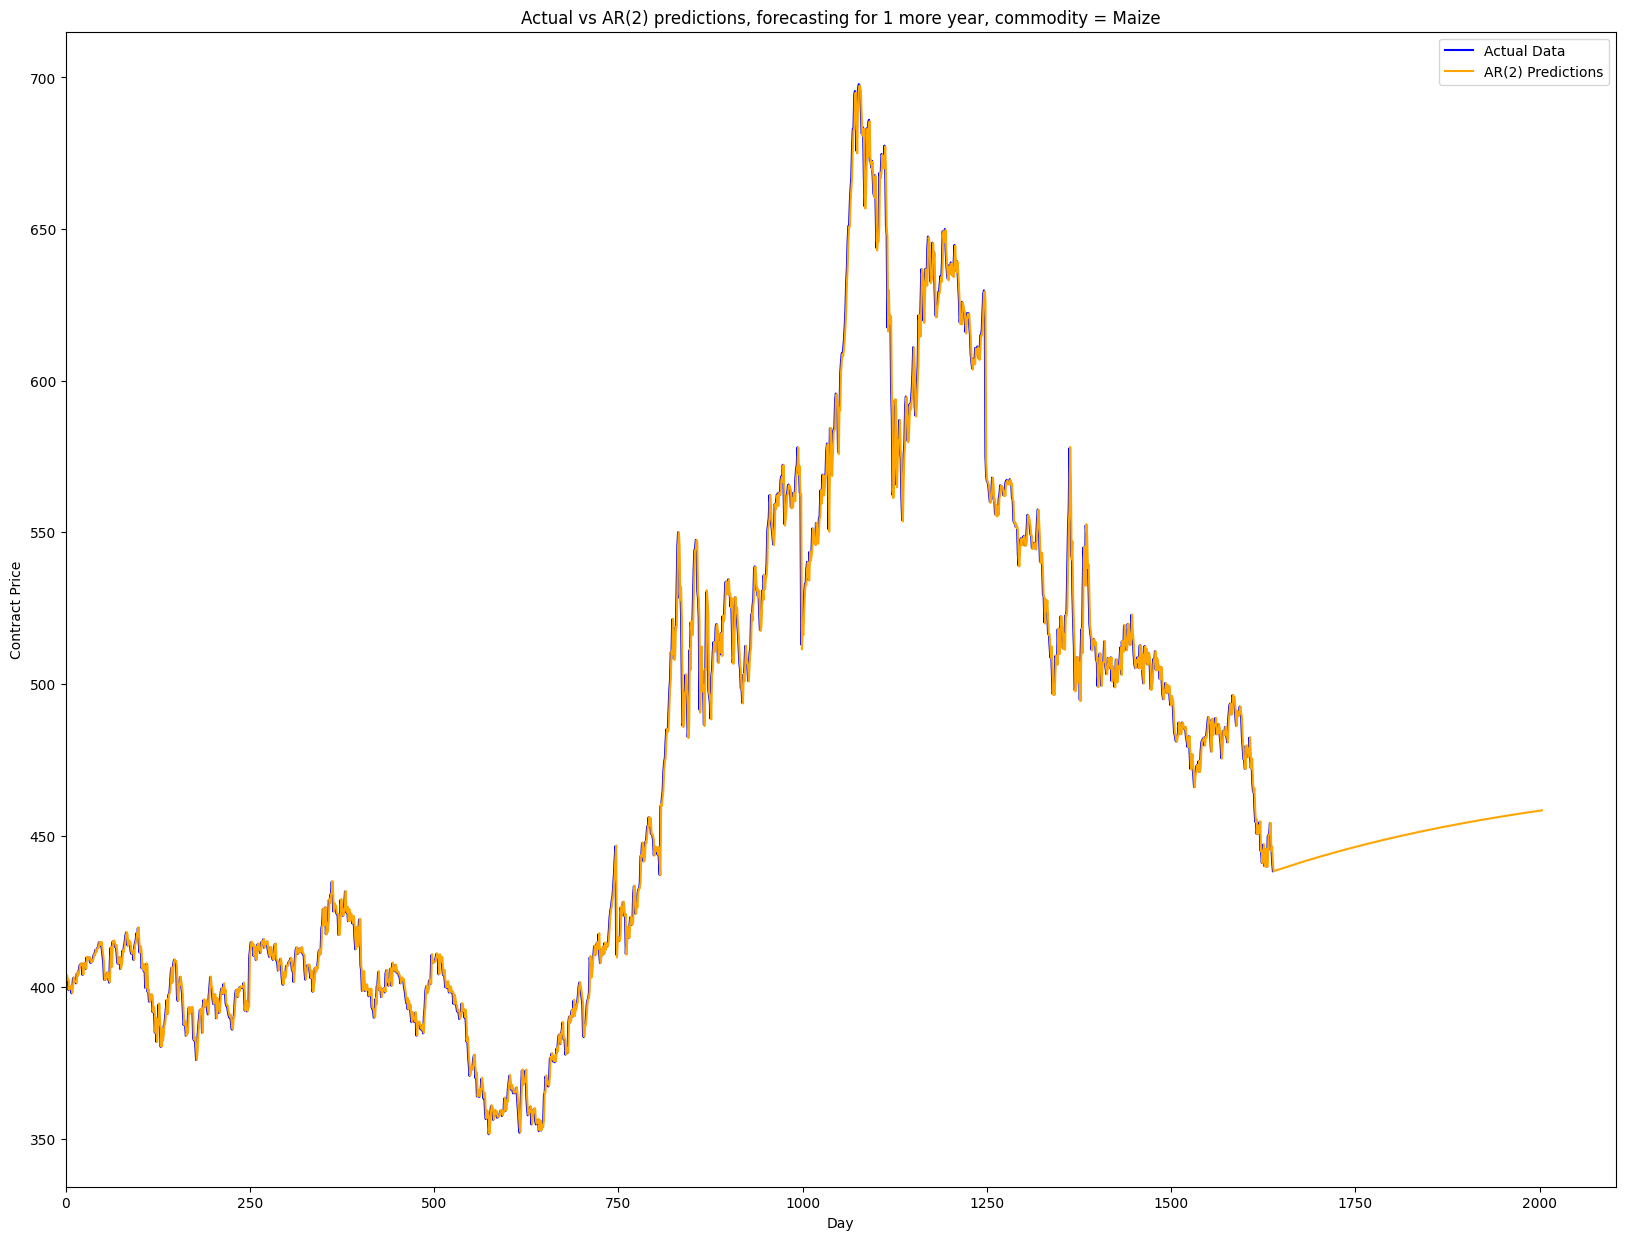

--------------------


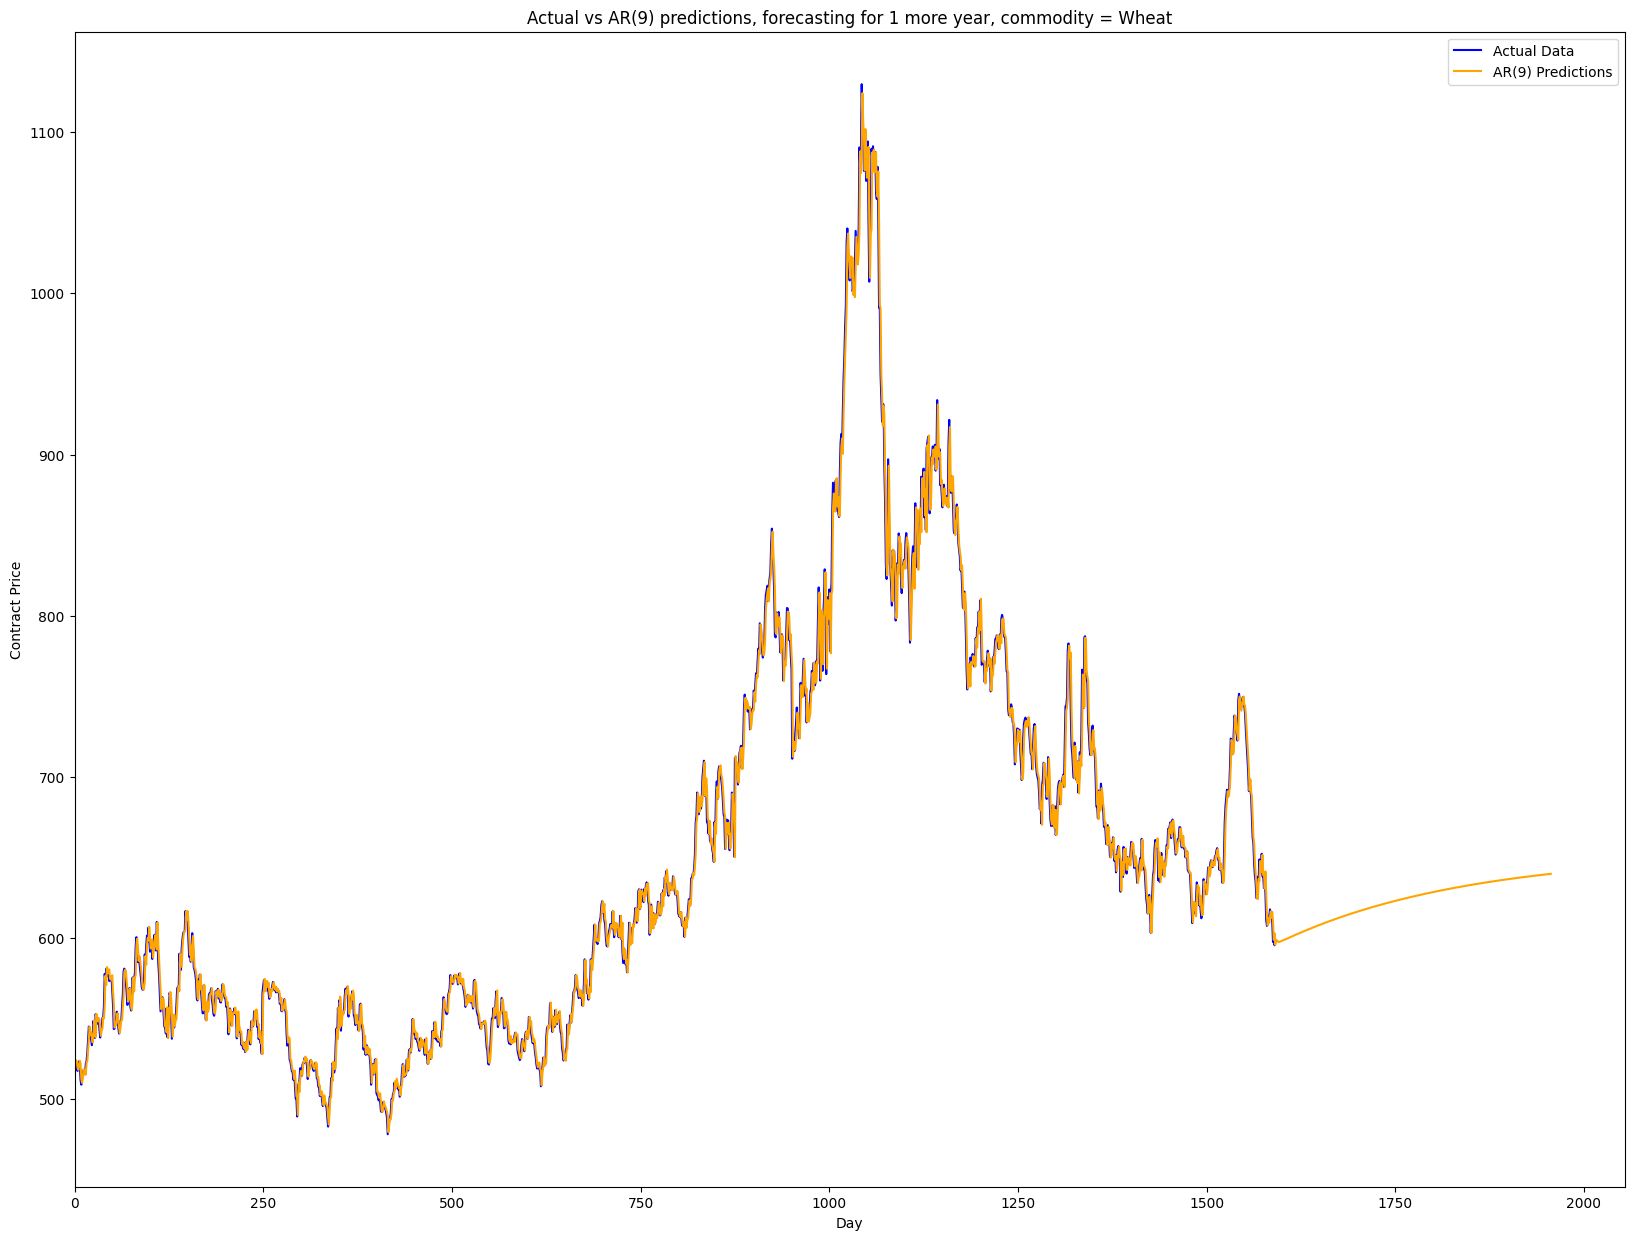

--------------------


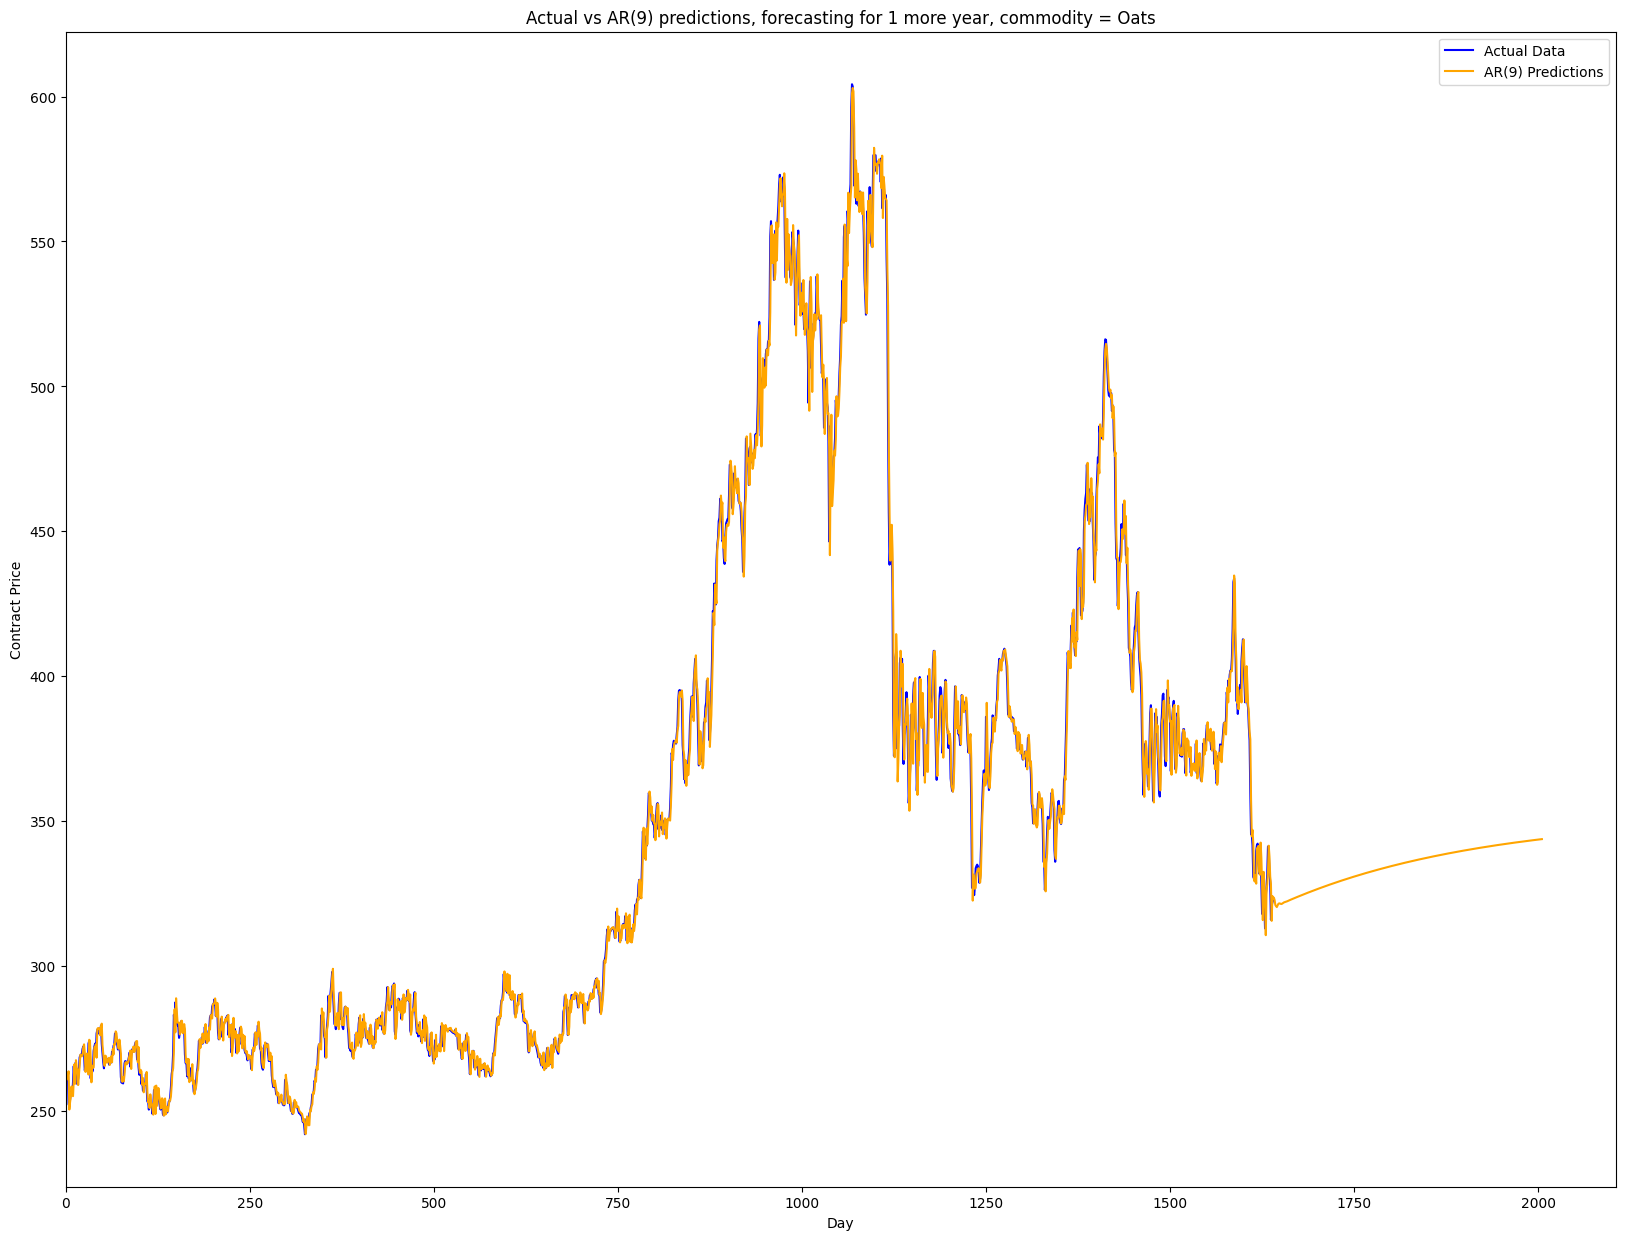

--------------------


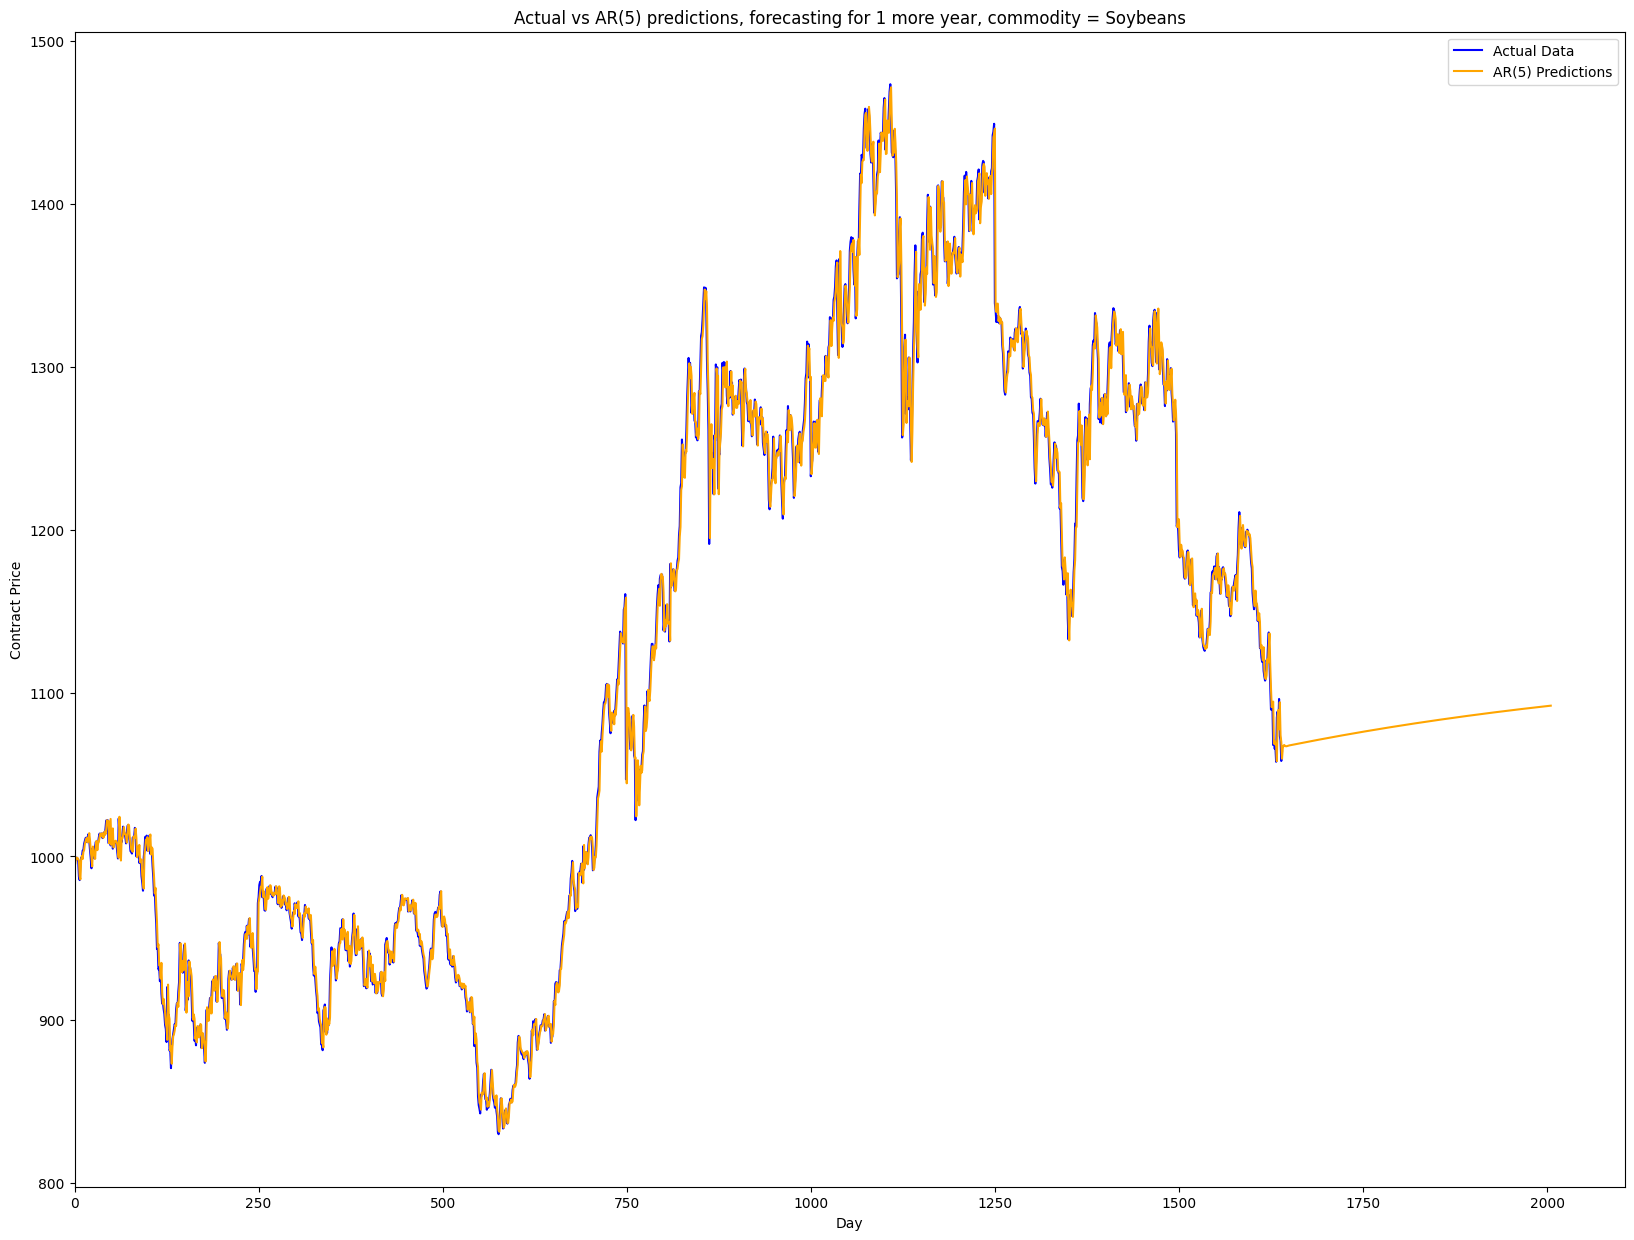

--------------------


In [5]:
for i, dataset in enumerate(commodities_datasets):
    best_ar_model = ARIMA(dataset[Y_COLUMN], order=(best_orders[i], 0, 0))
    best_ar_model_fit = best_ar_model.fit()

    start = 1  # Start from the second observation
    end = len(dataset[Y_COLUMN]) - 1  # End index for predictions

    best_ar_model_fit_predictions = best_ar_model_fit.predict(start=start, end=end+365) # Predicting for one more year

    # Slice the actual data to exclude the first observation
    actual_data_without_first = dataset[Y_COLUMN][1:]

    plt.figure(figsize=(20, 15))
    plt.plot(actual_data_without_first, label='Actual Data', color='blue')

    plt.plot(best_ar_model_fit_predictions, label=f'AR({best_orders[i]}) Predictions', color='orange')

    plt.xlabel('Day')
    plt.ylabel('Contract Price')
    plt.title(f'Actual vs AR({best_orders[i]}) predictions, forecasting for 1 more year, commodity = {commodities[i]}')
    plt.legend()
    plt.xlim(0,)
    plt.show()
    print("--------------------")

# Discussion about the forecasting's quality

It is evident that forecasting over prolonged periods using these models is impractical. These models predict the current value based on a linear interpolation of some preceding past values. However, when predictions are made for too long without incorporating new real data, we end up with an undesirable smoothing effect in the forecasted curve, as shown in the graphs. This smoothing is unlikely to represent the actual price fluctuations that will occur for sure in the next year. It appears to be a cascading error in the model, resulting from the lack of new data to learn from. However, if new data were available on a daily basis, the model could perform better by relying on more recent information at each step. Clearly, these models would yield better results if we limit the forecast horizon.
